In [419]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


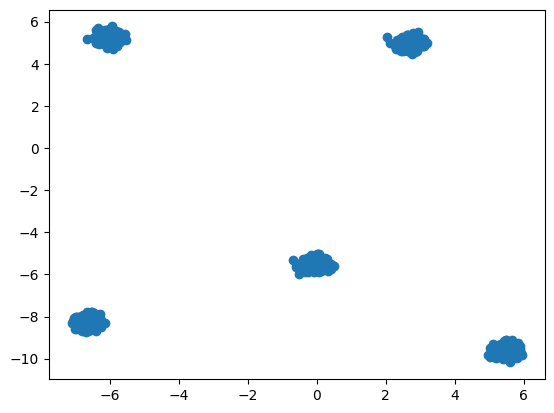

In [760]:
x, y= make_blobs(n_samples=1000, centers=5, n_features=2,
                       cluster_std=0.20, random_state=10)
plt.scatter(x[:, 0], x[:, 1]);

In [700]:
def cal_centroid(x,centroid , k ,distance, curr_map):
    

    for i in range(0,k):

      distance[:, i] =  np.sum(((x-centroid[i])**2), axis=1).T
      

    for i in range(0,len(curr_map)):
    
     min_index = np.argmin(distance[i])
     curr_map[i] = min_index

    for i in range(0, k):
  
      group = np.where(curr_map==i)
      
      
      group_mean = np.mean(x[group],axis=0)
      

      centroid[i] = group_mean

    return x, centroid,k, distance, curr_map 



In [754]:
def K_means(x,k, iterations):
    n = len(x)
    centroid = x[np.random.randint(n, size=k),:]
    distance = np.zeros((n, k))
  
    curr_map = np.zeros(n)

    steps = 0
    
    while (steps <iterations) :
       x,centroid,k,distance,curr_map  =  cal_centroid(x,centroid,k,distance, curr_map)
       steps +=1
    
    
    return curr_map,centroid, steps
    

In [765]:
y, centroid, steps = K_means(x, k=5, iterations=100) 

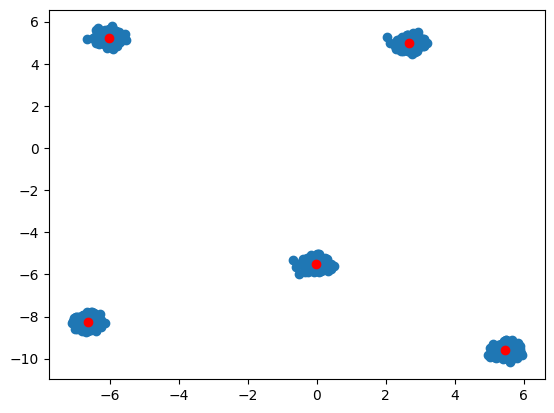

In [766]:
plt.scatter(x[:, 0], x[:, 1]);
plt.scatter(centroid[:, 0], centroid[:, 1], c='red');

In [767]:
centroid, steps

(array([[-0.03864426, -5.50399379],
        [-6.04360812,  5.2238616 ],
        [ 2.66638169,  4.97302933],
        [-6.64117501, -8.24490345],
        [ 5.45190976, -9.59175177]]),
 100)